## Amazon Products Reviews (Kaggle Dataset)
### Sentiment Analysis

In this notebook, We need to classify reviews as positive or negative for
Kaggle Data Set about Amazon Products Reviews.

#### The following are steps will go through:-
1. Simple text cleaning processes
2. Lexicon-based text processing using the NLTK (Natural Language Toolkit) library
    * Stop words removal 
    * Stemming   
    * Lemmatization

### Import necessary libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
#from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
#import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
#import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#from gensim.models import Word2Vec
from tqdm import tqdm
#import xgboost as xgb
#from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

### Reading the Dataset


In [2]:
df = pd.read_csv("H:/MCIT training/Use Case 2/data.csv")

### Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

### Show data shape

In [4]:
df.shape

(34660, 21)

### See sample of the data

In [5]:
df.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


### Drop unnecessary columns

In [6]:
df1 = df.drop(['id','name','asins','brand','categories','keys','manufacturer','reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.didPurchase','reviews.doRecommend','reviews.id','reviews.numHelpful','reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username','reviews.title'], axis=1)

### Show data info after dropping unnecessary columns

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


### Handling null values in reviews rating column as it is the label column using mode

In [8]:
df1['reviews.rating'].describe()

count    34627.000000
mean         4.584573
std          0.735653
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

In [9]:
reviews_rating_mode = df1["reviews.rating"].mode()
print("reviews rating mode is: {}".format(reviews_rating_mode[0]))


reviews rating mode is: 5.0


In [10]:
df1["reviews.rating"].fillna(reviews_rating_mode[0],inplace=True)

In [11]:
print(df1['reviews.rating'].unique())

[5. 4. 2. 1. 3.]


In [12]:
print(df1['reviews.rating'].isna().sum())

0


### Show data again after updating null values in rating views

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34660 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


### Dropping null values in reviews text as it is just on column

In [14]:
df1_with_no_miss = df1.dropna()
df1_with_no_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34659 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34659 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 812.3+ KB


### Drawing reviews.rating

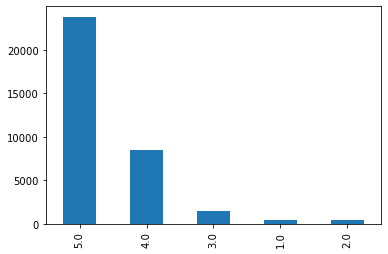

In [15]:
df1_with_no_miss["reviews.rating"].value_counts().plot.bar()


### Classifying text as postive and negative¶


In [16]:
df1_with_no_miss["is.positive"] = df1_with_no_miss["reviews.rating"]>=3
#df1_with_no_miss["is.positive"] = df1_with_no_miss["is.positive"].replace([True , False] , ["pos" , "neg"])


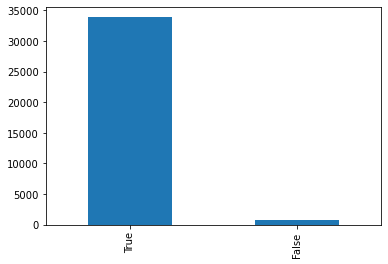

In [17]:
df1_with_no_miss["is.positive"].value_counts().plot.bar()


In [18]:
df1_with_no_miss["is.positive"].value_counts()

True     33847
False      812
Name: is.positive, dtype: int64

In [19]:
   
df_negative = df1_with_no_miss[df1_with_no_miss['is.positive'] == False] 


In [20]:
df_negative.head(10)

,reviews.rating,reviews.text,is.positive
117,2.0,Didn't have some of the features I was looking...,False
126,1.0,i Bought this around black friday for $60 hopi...,False
169,1.0,I bought this tablet for my 4 year old daughte...,False
241,1.0,Didn't want to go to the sites amazon wanted m...,False
281,2.0,Not a good product short battery life i can on...,False
297,1.0,This Kindle is so overloaded with apps that I ...,False
310,1.0,I liked it at first except the browser is kind...,False
338,1.0,"If ads dont bother you, then this may be a dec...",False
444,2.0,"If you shop on Amazon all the time, this will ...",False
446,2.0,fire tablet is very powerful for the size and ...,False


In [21]:
#df_positive = df1_with_no_miss[df1_with_no_miss['is.positive'] == True].head(1000) 

In [22]:
#df_positive['is.positive'].value_counts()

In [23]:
#frames = [df_positive, df_negative]

In [24]:
#print(frames)

In [25]:
#df_sample = pd.concat(frames)


In [26]:
#df_sample.head()

In [27]:
#df_sample=df_sample.sample(n=1812)

In [28]:
#df_sample.head()

### Separating Response Variable and Feature

In [29]:
# Splitting the Data Set into Train and Test Sets with sampling
#X = df_sample['reviews.text']
#y = df_sample['is.positive']

# Splitting the Data Set into Train and Test Sets without sampling
X = df1_with_no_miss['reviews.text']
y = df1_with_no_miss['is.positive']



### Splitting Dataset into Train and Test Set

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.

In [30]:
from sklearn.model_selection import train_test_split

# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(25994,)
Test Set Shape		:(8665,)


In [32]:
X_test.head()

20764    Awesome product! Backlit, shows you page numbe...
33858    I love it, easy to learn and operate. Quick re...
23012    This product is really helpful and excellent f...
1118     My husband and I purchased the new Amazon Kind...
6127     The screen is adequate and the service is reli...
Name: reviews.text, dtype: object

In [33]:
y_test.head()

20764    True
33858    True
23012    True
1118     True
6127     True
Name: is.positive, dtype: bool

##  Modelling

This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who bought these products.

In order to turn a collection of text documents into numerical feature vectors will use the following techniques.

## 1- CountVectorizer Bag of Words

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [35]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 12213


In [36]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [37]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,00,000,000s,01,06,0ff,0ghz,0ne,10,100,...,zipper,zippy,zone,zones,zoo,zoom,zoomed,zooming,zooms,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating a function for applying different algorithms


In [38]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [39]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.9552887674299894


In [40]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.03      0.02      0.03       205
        True       0.98      0.98      0.98      8460

    accuracy                           0.96      8665
   macro avg       0.50      0.50      0.50      8665
weighted avg       0.95      0.96      0.96      8665



### 2- Logistic Regression with CountVectorizer


In [41]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9570014258730823


#### Classification Report

In [42]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

       False       0.24      0.61      0.35       205
        True       0.99      0.95      0.97      8460

    accuracy                           0.95      8665
   macro avg       0.62      0.78      0.66      8665
weighted avg       0.97      0.95      0.96      8665



#### Confusion Matrix

### Confusion Matrix Plot Function

Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [45]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

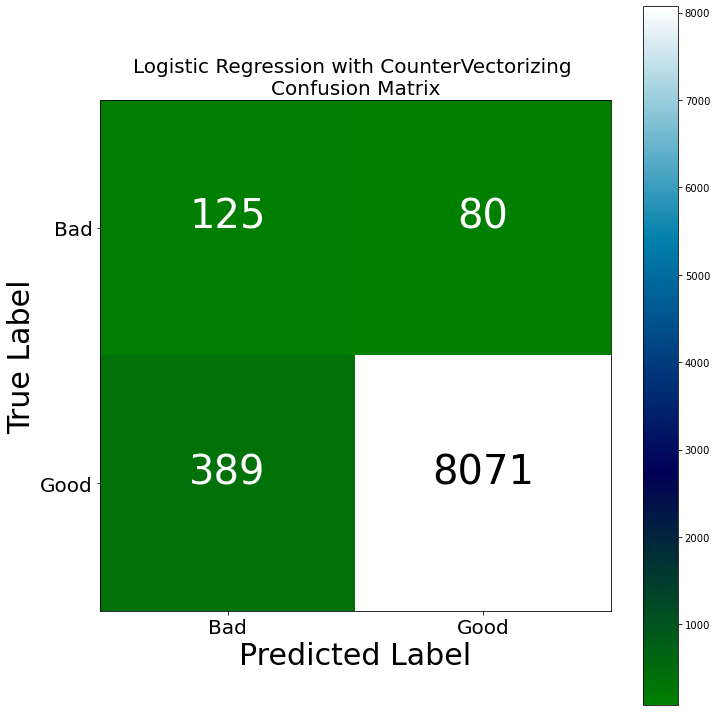

In [46]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 3- Random Forest with CountVectorizer¶

In [47]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.9652238517798998


#### Classification Report

In [48]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

       False       1.00      0.01      0.02       205
        True       0.98      1.00      0.99      8460

    accuracy                           0.98      8665
   macro avg       0.99      0.50      0.50      8665
weighted avg       0.98      0.98      0.97      8665



#### Confusion Matrix

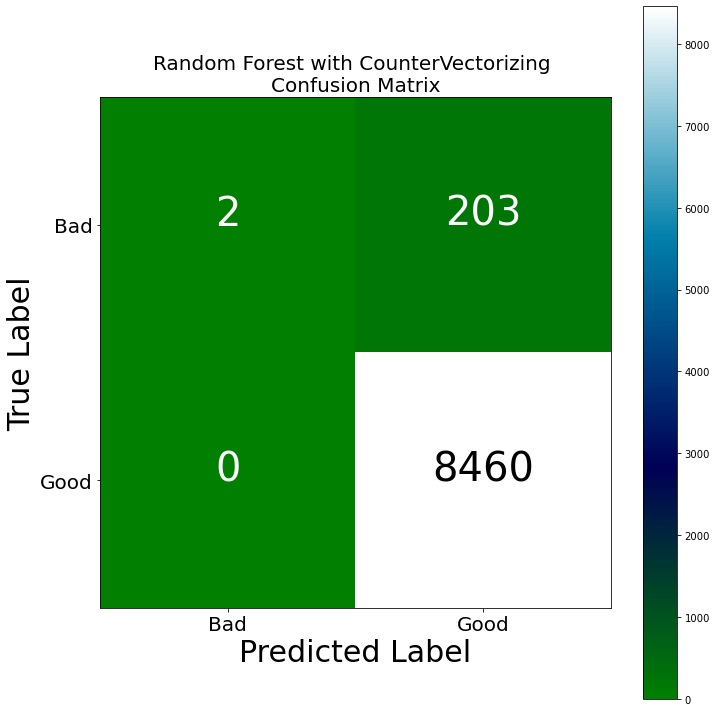

In [49]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4- Naive Bayes with CountVectorizer

In [51]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.970026843591428


#### Classification Report

In [52]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

       False       0.49      0.15      0.23       205
        True       0.98      1.00      0.99      8460

    accuracy                           0.98      8665
   macro avg       0.74      0.57      0.61      8665
weighted avg       0.97      0.98      0.97      8665



#### Confusion Matrix

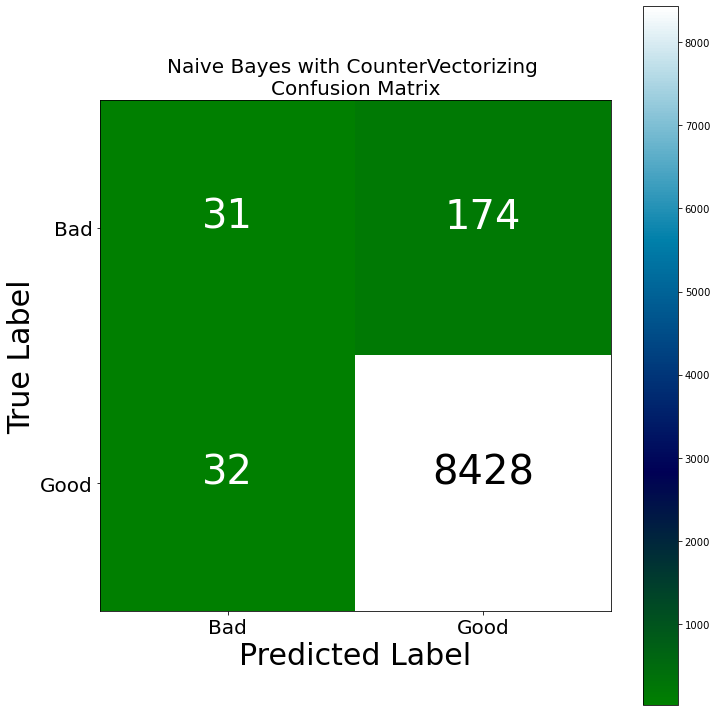

In [53]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 5- XGBoost with CountVectorizer

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb
from xgboost import XGBClassifier

In [56]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.9708977496758778


#### Classification Report

In [57]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

       False       0.60      0.15      0.24       205
        True       0.98      1.00      0.99      8460

    accuracy                           0.98      8665
   macro avg       0.79      0.57      0.61      8665
weighted avg       0.97      0.98      0.97      8665



#### Confusion Matrix

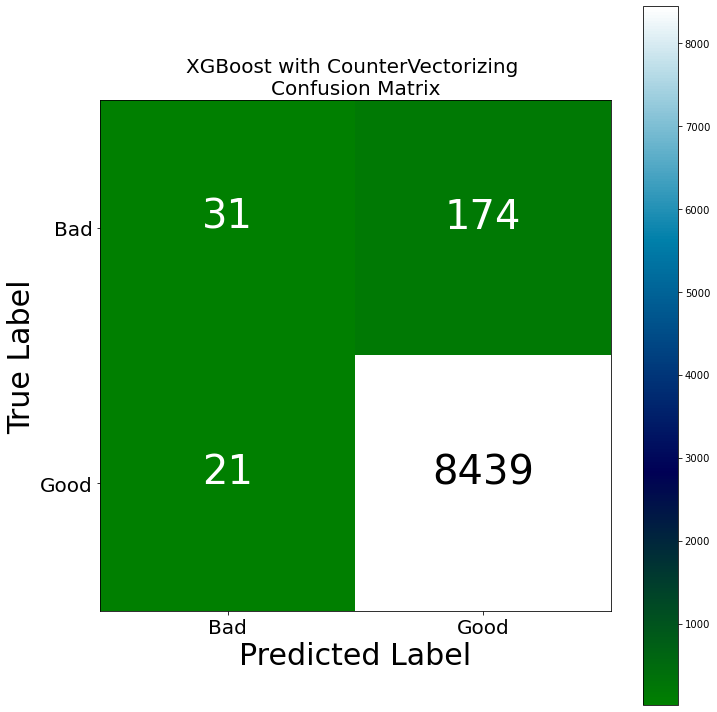

In [58]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 6- CatBoost with CountVectorizer

In [60]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=ad791db3b98deabdebf688cbaeaa48010eb08656e9d9b6165a3e3b535597ce58
  Stored in directory: c:\users\mohamed.elsayed\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [66]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
#modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
#y_pred_cv_catboost = y_pred

IndentationError: unexpected indent (<ipython-input-66-5e7fa50e589c>, line 3)

#### Classification Report

In [67]:
# Compute and print the classification report
#print(classification_report(y_test, y_pred_cv_catboost))

###  Comparison of Models with CountVectorizer

In [68]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [69]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 Score Plotting

In [70]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [72]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [73]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.945874 bad       0.243191  0.609756  0.347705   
                                  good      0.990185  0.954019  0.971766   
                                  average   0.972513  0.945874  0.957001   
           Random Forest 0.976572 bad       1.000000  0.009756  0.019324   
                                  good      0.976567  1.000000  0.988145   
                                  average   0.977121  0.976572  0.965224   
           Naive Bayes   0.976226 bad       0.492063  0.151220  0.231343   
                                  good      0.979772  0.996217  0.987926   
                                  average   0.968234  0.976226  0.970027   
           XGBoost       0.977496 bad       0.596154  0.151220  0.241245   
                                  good      0.979798  0.997518  0.988578   
                                  average   0.970722  0.977496  0.970898   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.945874 bad        205.0  
                                  good      8460.0  
                                  average   8665.0  
           Random Forest 0.976572 bad        205.0  
                                  good      8460.0  
                                  average   8665.0  
           Naive Bayes   0.976226 bad        205.0  
                                  good      8460.0  
                                  average   8665.0  
           XGBoost       0.977496 bad        205.0  
                                  good      8460.0  
                                  average   8665.0

### Average f1 Score - Models with CountVectorizer

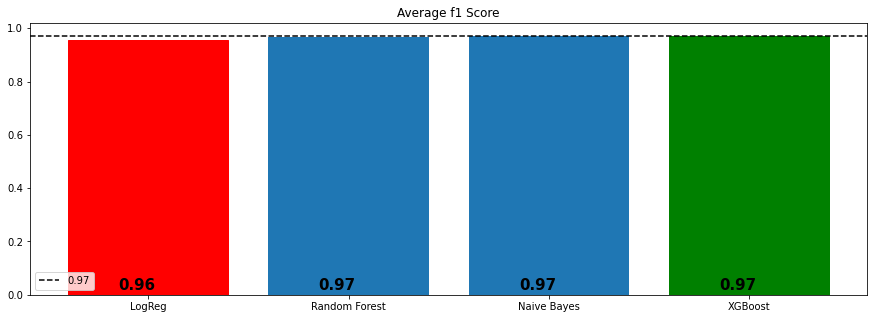

In [74]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

### So i found this accuracy is very high this is correct or the model is overfitting and if there is problem how can overcome it 